#start 
ce projet utilise un model pre entrainer  vggface 
pip install git+https://github.com/rcmalli/keras-vggface.git

In [7]:
import os
from tensorflow import keras


from keras_vggface.vggface import VGGFace
from keras.layers import Input

import mtcnn
import matplotlib as pl
import cv2
from PIL import Image
from numpy import asarray


from numpy import expand_dims
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
from matplotlib import pyplot

1/1 [==============================] - 0s 277ms/step


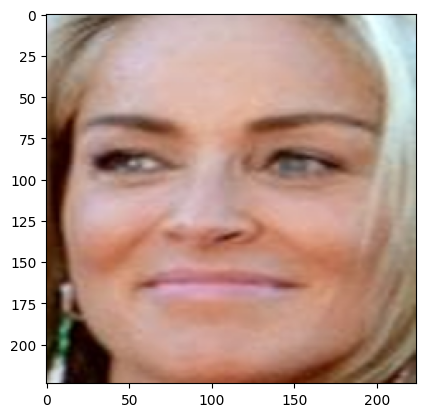

In [19]:

image_path='images/antoni1.jpg'
stone="images/sharon_stone1.jpg"

def extract_face(image_path,required_size=(224,224)):
  # pixels=pyplot.imread(image_path) #cv2.imread(image_path)
   pixels=cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB)
   # create the detector, using default weights
   detector = mtcnn.MTCNN()
   # detect faces in the image
   results = detector.detect_faces(pixels)
   x1,y1,widht, height=results[0]['box'] 
   x2,y2=x1+widht,y1+height 
   face=pixels[y1:y2,x1:x2]
   image = Image.fromarray(face)
   image = image.resize(required_size)
   face_array = asarray(image)
   return face_array 

face=extract_face(stone)
pyplot.imshow(face)
pyplot.show()

In [20]:

def identify_face(pixels):         
   # convert one face into samples
   pixels = pixels.astype('float32')
   samples = expand_dims(pixels, axis=0)
   # prepare the face for the model, e.g. center pixels
   samples = preprocess_input(samples, version=2)
   # create a vggface model
 #  model = VGGFace(model='vgg16') 

   model = VGGFace(model='resnet50')
  # vggface = VGGFace(model='senet50')
  
   # perform prediction
   pred = model.predict(samples)
   print("pred",pred)
   results = decode_predictions(pred)
   print("result",results)
   for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1]*100))

identify_face(face)

1/1 [==============================] - 2s 2s/step
pred [[5.7892219e-10 2.6119824e-09 2.9357674e-09 ... 4.9155382e-09
  2.6627374e-09 1.4564717e-08]]
result [[["b' Sharon_Stone'", 0.99587965], ["b' Noelle_Reno'", 0.001124933], ["b' Elisabeth_R\\xc3\\xb6hm'", 0.00021005023], ["b' Tina_Maze'", 0.00019505146], ["b' Emma_Atkins'", 0.00018226818]]]
b' Sharon_Stone': 99.588%
b' Noelle_Reno': 0.112%
b' Elisabeth_R\xc3\xb6hm': 0.021%
b' Tina_Maze': 0.020%
b' Emma_Atkins': 0.018%


In [21]:
path="facerecognise/lfw_funneled"
dataset = keras.utils.image_dataset_from_directory(path, batch_size=64, image_size=(224, 224))

Found 13233 files belonging to 5749 classes.


In [23]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

label tf.Tensor(
[3100 1072 3510 4279 3430 5342  751 4588 5536 4097 2768 5101 3772 4130
 4784  355 1047 5449 1833 4572  706 5104 3185 1196 3283 5586   84 2393
 1842 1866 2085 2153 2521 3303 1800 1560 5146 3338  201 1650 4765 3602
 1251 1487 3351  802 1417 5213 5131 1487 1958 2350 3941  201 2886  127
 1867 5489  385  448 3004 1871 3011 2337], shape=(64,), dtype=int32)
label tf.Tensor(
[1934 1871 1903 3434 2643 2412 2688 1905  786 4876 4766 1383 2925 1871
 1201 5162 3412 2467 5627 1933 2288 1104 3565  803  577 2381 5133 4579
 4933 5363  918   14 4003 5634  373 4851 1590 1933 1594 2682 2957 2660
 4538 5039 5096 1871 4180 4290 4766  755 4469  417  870 2468 1757 2288
 5259 4504 2288  309 1893 2370  224  756], shape=(64,), dtype=int32)
label tf.Tensor(
[3278 2105 3976 3162 4438 3595 1312  786 4833 3281  778 2609 1587 4215
 2801 5354 2785 1059 1862 5569 2546 5541 1871 1866 2424  304 2143 1404
 2688 4577 4207 2175  188 1065 5471 5428 2514 4057 1319 1047 3837    7
  373 1892  737 4263 3761 2035

label tf.Tensor(
[ 663 4550 5458 4760 5317 1704 2507 1933 2514 3981 2548  986 1739 2021
 5339 2500 1871 2162 2163  127 5275 4653 3571 4909  802 3231 1404 4676
 5458  385 1871  876 5458 2288 4655 1416  428 1045 2554 3434 4466 3718
 1936 3676 3520 3745 3527 1909 2175 2050 3454 1406 3467  538  921 2288
 4218 1222 3351 3386 3396 2688 1572 2175], shape=(64,), dtype=int32)
label tf.Tensor(
[3888  955 1603 3109  373 2154 5553  876 1207 1476 5068 3704 3176 4440
 1577 4463  373  755 3284  673 1414 3276 3631 1871 1933 3349 2507 2021
 5045 1207 1047 4172 5428 1047 2936  373 4059 5562  136 4194 3620 2928
  969 1643 1347 2830 2201 3127  786  629  822 5639 4459 3794 5354 4622
 3202  384  222 4478 1476 1404 5258 1259], shape=(64,), dtype=int32)
label tf.Tensor(
[4398 3011 4819 1404  847 4119 5627  206 2769 5605  340 1047 3153 4760
 5583 5482  248 4258 4197 5541 3948 1871 2110 5481 4622 4365 4108 3848
 2468 2007 3962 1068 3618 1853 4424 4835 4773 3291 3248  539 2175  770
  321 5527 5126  558 2069 4129

label tf.Tensor(
[2265 1286 1001 3794 3704 1764 2276 5550  210 2816 1850 3334 2682   52
 1871 2210  366 1422 1721 3383 2682 4242  629 5171 5039 1160 1047 1808
 1885 1366 5664  973  915 3387 2097 1871 5467 1026 2947 4188 2430 2941
 5434 5563 2530 5230  420 5457 2279 4243  255 1933 4012 4528 1993 2319
 1047 3147 2922 1318 4898  403  422 5224], shape=(64,), dtype=int32)
label tf.Tensor(
[4444 2507 5569 1881 1722 1697 4274 4057 5230 4233  303 1501 5684 1645
 1871 4793 3472 3123 1871 2298 4898 2816 2526 2055 1930  994 3996 2530
 2210 5312 3127  849 4675 5415  479 4027 5569  248 2766 5148 5620 5543
  431 4805 5429 4553 2725 5148 1632 2288 1602 4104 1005 4359 2109 1964
 2777 1871 5171 3327 2858  679 2468 1423], shape=(64,), dtype=int32)
label tf.Tensor(
[ 112 1188 1871 1404 4126 1047 5514 1775 3132 4867 3886  436   18 1933
 2884 1871 2798  781 4686 3406 1512  656 3216 2163 2028 4236 3355 2846
 4454 3869 5671 3128 4371 4618 5159 1179 1189 1047 2664 2865 2562 4753
 2044 1779  996 1108 4078 2735

label tf.Tensor(
[4773 5336 1892 1904 2121 5724  367 5298 4057 1047 2088 2661 3323 5536
 1102 3457 3662 4534 4200 4272 3434 3531  472 2857 5246 2993 5057  788
  325 4377 2288 4788 1871 1871 1148  373  620  427 5441  115 5110 4033
 1047 3166 3251 2078 4077 1413 1964 1857   14 4554 4170 3091 4456 2507
 1871 4202 5458 1871  704 2682 3480 2303], shape=(64,), dtype=int32)
label tf.Tensor(
[5499   20 1875 4773   16 5308 1588 3327 3389 1260 1599 2679  883  763
 4470 1270 3327 3233  210 2460 5263 5158 3376 2163 3982 2680 4778 3119
 3745  380  371 1993 5175 5536 1674 3309 4017 2175 5357 2623 2023 3127
 3993  321 1479 4057 1940 2735 3383 4836 4816 5458 2263 5338 3044 4738
 1871 2857 1871 5241 2465 4755 1158   85], shape=(64,), dtype=int32)
label tf.Tensor(
[4664 1871 2027   94 3655 4888 1411  210 2491 5031 5064  786 4304 5735
 1871 1871 4833 2746 2290  373 4242 1047 5541 3127 1769   84 4455  373
 1203   46  209 2585 1871 1043 2454 4760 1892 1945 5262 2507 4123 5458
 1545 5427 4274  719 2432 3204

label tf.Tensor(
[1063 3401 5035 2730   34 5428  607 2378 3941 4457  906  304 5377 4057
 3885 2951  363  385  639 3303 4333 4146 5364  196 3616  823  360 1047
 3015 2135 2082  187 1940 3193 1871 1866 5448 1412 2723 5667 1156 1204
 5354 2768  421 1699 4592 3124   58 3254 2892 4161 2477 2854  693 3401
 5252 1404  340 2723 4936 1871 3180 3044], shape=(64,), dtype=int32)
label tf.Tensor(
[1327 1052  509 2931 1046 5458 5059 2076 3375 5458 1404 1568 1995 3459
 3475 3195 1710 5230 4647 2946 3522  371 2721 2441 5132 5458  507 1964
 5736 3934 5428 5557 2445 3233 4708 5055 1133 3694 2163   42 2136 4982
 1695 5032 2530 1712 2290 2579 5075 2609 4673 2694 2819 3599 1901 5338
 1047 4120 1871  223 1871 3198 1404 4957], shape=(64,), dtype=int32)
label tf.Tensor(
[1871 1933 1270 2133 1867 2956 4270 4784  317   20 5065 2680  354 4572
 2688 1964 4108 1842 1125 3867 2446 5654 4061 1871 1252 2163 3011 4403
 1871 1892 1207 1047 2758 3188 3434 5532 1964 5527 2713 2468 5174 4037
 5292  476 5317 1047 5361 3570

label tf.Tensor(
[5076 5276  893   20 3591 3892 4912 2998 1314 4315 5442 4138  531 3636
   52  619 3833 1964 3340 5354 5220  544 3364  480 4269 1649  935 4269
  304 2112 1956 1964 3351 2530 1383 4574 3495 5458 2775  795 5685 1548
 1871 3401 3032 3176 5132 2316 1871 3100 3351 1151  411 2329  950  825
 1704 5611 4285 1871 4572 5401 5293 4184], shape=(64,), dtype=int32)
label tf.Tensor(
[5304 2116  210  867 2786  499 5569 2708 3034 5065 5708 4440 5107 4403
 3412 1511 4972 2361 3434 1933 3399  903 1047  484 5458 4606 2213 1285
 1676 1370 5408 4684 3202 2468 4116 3767  744 2507 4086 2288  827 3704
 1022 3728 1778 4680 3815 4581 3386 2734 2484  319 1560 2530 2825 2355
 2974 3341 4485 5355 5081 4243 1871 5016], shape=(64,), dtype=int32)
label tf.Tensor(
[4606 3859 1226 2542 4296 2354 4333 2823 4876 5179 1871 5458 2140 2155
 1667 2175 1871 1047 2763 1383 1516 2276 3383  963  132 3982 3207  857
 1966 1871 1455  208 2950 3894 5084 2510 5252  248 2155 5659 2506 1165
 1418 3401 3880  370 4676 5704

label tf.Tensor(
[1323 1774 1477 4006 2155 2175 1404 2404 5688 5036 4243 4446 3553 5700
 4316 2175 1104 2506 1404 2921 2947 4551 1067 1871 2328   52 2476 3007
 1279 3440 3363 1452 1487 4084 5211 3500  373 2131 3528 4652 1620 1453
 3401  210 4404 3187 4073 4187 4053 4403 2474  843 1871 2462 3430 4268
 4722 1895 1871  686  304 3167 4089  818], shape=(64,), dtype=int32)
label tf.Tensor(
[  98 5095 4551 2916 1852 1871 1861 5569 1719 3430 5408  759 2869 1445
 1237  532 5300 2862 1729 4333 5548 3512 2941 3266 2682 3824 2842   31
 3869 3470 3062 5578 1318 1892 4027 2920 1138 1188 1871 3566 5573 3468
 1451 2148 3202 5569 5267 4136  782  492 3861 1347 5541  373 4373  133
 5065 2875 1933 1627 1871  543 1280 2884], shape=(64,), dtype=int32)
label tf.Tensor(
[1871 1628  600   66  251  706 3692  326 1234 4384 2920 2978 1047  114
 1207  876 3148 1295 2943 1909 1871 5160 3458 3517 1815 2884 4566 1993
 4018 4002 2269 4072 3038 2441  304 4868  210 2530 2366 3634 4792  399
 4333  924 4184 2746  586 3786

label tf.Tensor(
[4456 2994 2189  373 5605  182  958 5196 5016 4963 5018   67 3171  746
 3150 4869 1047  531 4551 1704 2996 1448 2175 4113 1871 5465 3412 3704
 5212 2154 2469 2019 1027 4581 2352 3502 4593 4566 3781 1936 4012 4662
 1850 5659 1971 1482 1404 1741  448 2461  370 2012 4654 1261 1468 2609
 4079 2514 3982 3767 1871 3391 3593 1535], shape=(64,), dtype=int32)
label tf.Tensor(
[5453 4456 5176 1870 4531 3709  385 2570 4408 1415  772 4057  876 1101
 5618 5363 4975  441 2438 1355 3737 4157 2569  304 4274 3144 4683 1467
 3042 1270 3062 2320 5659 4063   81 5517 1913 2288 3396 4797  377 3995
  904 3570  248 2182 2810 1871  912 4407 5684 4952  771 4242 5289 4196
 1397 2175  831 5659 2743 3814 5124 2506], shape=(64,), dtype=int32)
label tf.Tensor(
[4003 3746  972 5067 1852 4252 2468 1501 4961 2241 4206 3329 1871  805
 1047  876  221 3139 2468 4152 1679 4756  385 3623 3248 4049 4998 4502
 1519 3037 1047 4773 2614 1892 3351 2941 5038 2881 1898 4935 1504  166
 3946 5458 2570 4963 2410 5456

label tf.Tensor(
[ 659 3747 2778 4576  449 5428 2290 1823 2312 1542 1154 5428 1871 2579
 1616 1871  576 2145 2340 4076 1619  309 1892 4692 1786 5351 1871  214
 2288 1305 3704 1871 5228 4670   93 3351 1404 3626 1871  417 2560 1210
 2655 4048 4411 4116 3331 2125 4115  608 2016 2530 3737 4080 4834 4749
  508 1836 3327 1838 4057 2349 2735 2705], shape=(64,), dtype=int32)
label tf.Tensor(
[3183 1465  313 3289 4566  490 3102 2422 1047  359 2008  387  538 1850
 1892 1871 2154 2062  712 1404 5565 4625 5543 1314 1364 3507 1746 4208
 4840 2175 2997 4786  629 1871 4564 1874 5354  322  860 2846 5354  997
 4210 1478 4382 2110 3299 5320 1775 1871  204   88 1871 1047 1590 4508
 1871 1047 2702 4242 4419 3769 2570  925], shape=(64,), dtype=int32)
label tf.Tensor(
[1871 5650 5347 5171  202 5569  660 5230 1465 4399 3498 4474 3643 2240
 1047 1198 2294 4800 5140  256 1963 5164 2682 5039 1383 2277 2659 4333
 5619 4572 2055 1443 2447 1207 5536  938 2322 2307 2514 2826 1047 3107
 2623  210 1892  373 1383 5605